img shape:  (100, 100, 3)
using RRT planner
iteration :  0


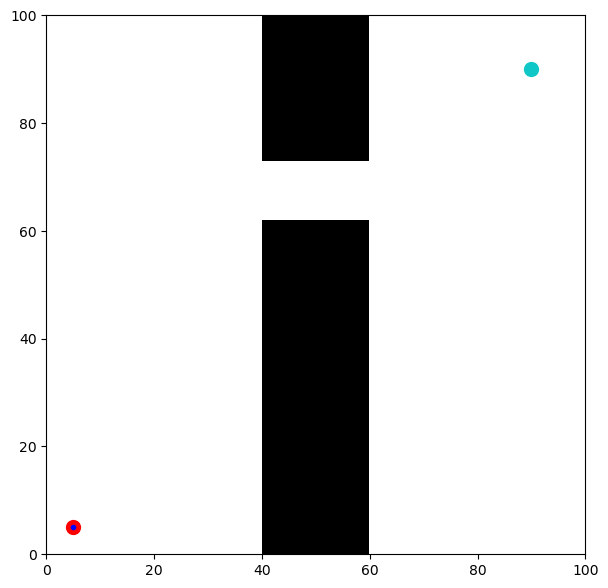

Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
iteration :  500


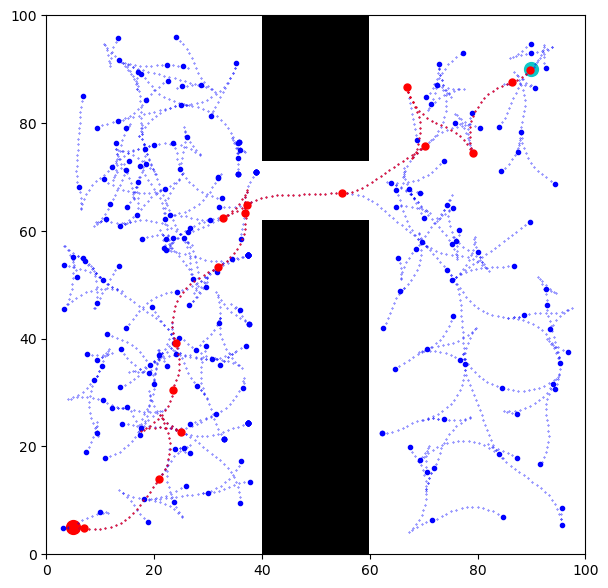

Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
iteration :  1000


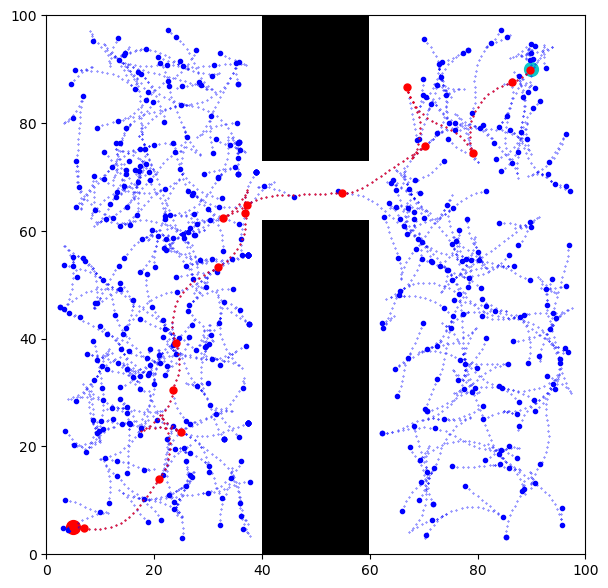

Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
iteration :  1500


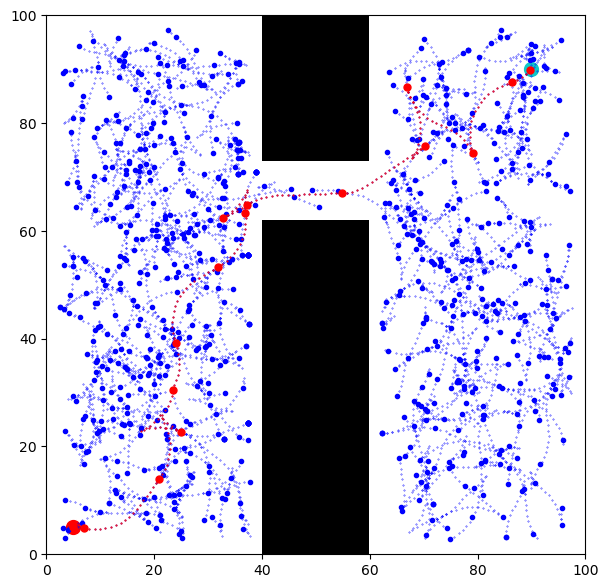

Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
iteration :  2000


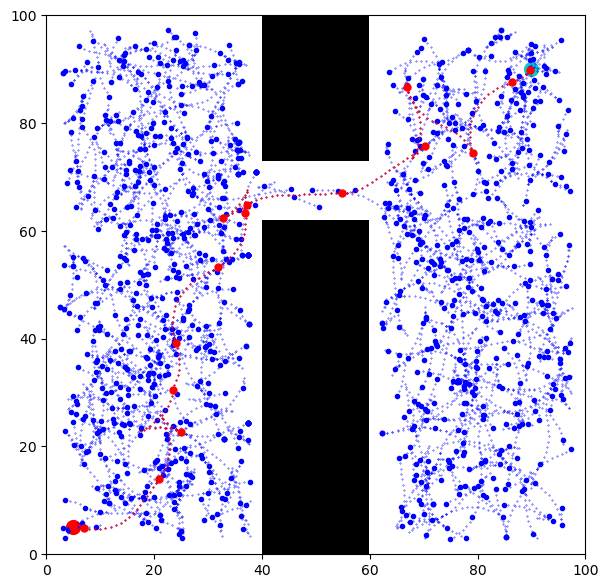

Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
iteration :  2500


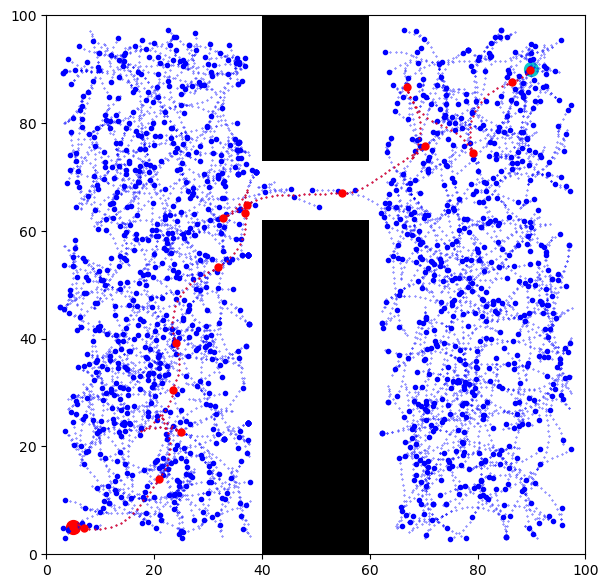

Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
iteration :  3000


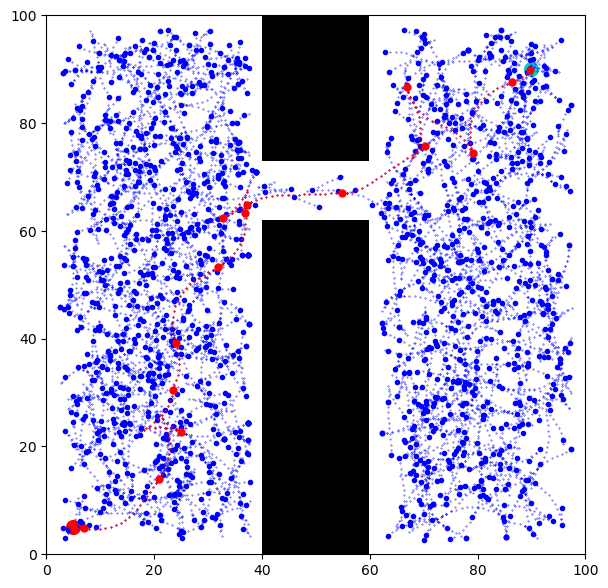

Found a path!
end iterations
total solution cost:  206.0
computation time: 48.32217264175415
total vertices:  1763


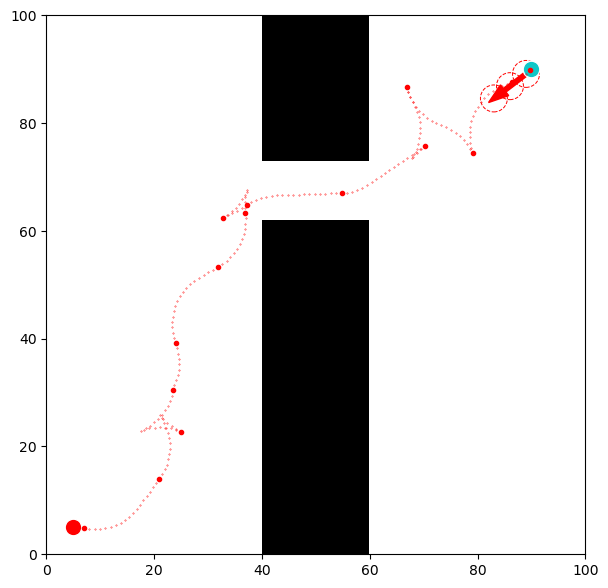

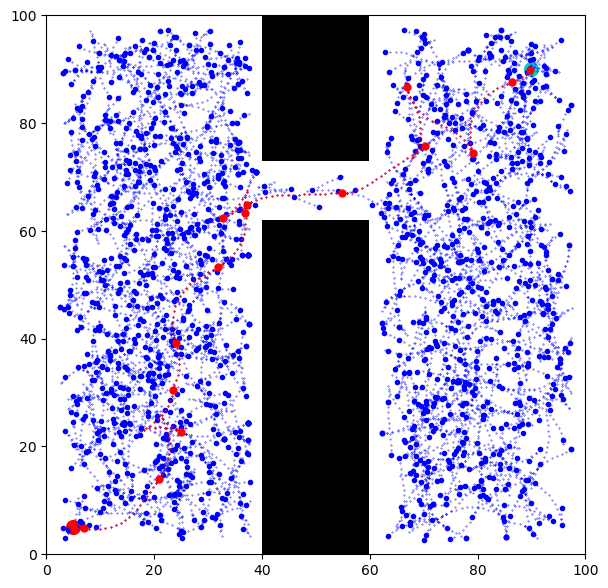

In [23]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import random
import sys
sys.path.insert(0, "..")
import matplotlib.pyplot as plt
import time
import math
from env_2d import Env2D
import numpy as np
import os
from rrt2d import RRT
from rrtstar2d import RRTstar

#RRT visualization parameters
visualize_tree = 'all' #None, 'solution_path' or 'all'
visualize_tree_iter=500 #None or int
visualize_vid = True #bool

#Set some problem parameters
x_lims = (0, 100) # low(inclusive), upper(exclusive) extents of world in x-axis
y_lims = (0, 100) # low(inclusive), upper(exclusive) extents of world in y-axis
X_dimensions = np.array([x_lims, y_lims])
start = (5, 5, 0)    #start state(world coordinates)
goal = (90, 90, math.pi*(5/4))  #goal state(world coordinates)
goal_bias_prob = 0.05
goal_region_threshold = 0.3
waypoint_step_size = 1
extend_len = 20 #tree_extend_length, must be a multiple of waypoint_step_size
turning_radius = 10 #the real turning_radius of a car is around 5 or 6, for a better visualization, we here use a turning_radius of 10
collision_radius = 2.5
max_iter = 3000

#Load environment from file 
# envfile = os.path.abspath("./motion_planning_datasets/100by100/mazes/test/904.png")
envfile = os.path.abspath("./motion_planning_datasets/100by100/shifting_gaps/train/1.png")
env_params = {'x_lims': x_lims, 'y_lims': y_lims,"turning_radius": turning_radius, 'collision_radius': collision_radius}
planning_env = Env2D()
planning_env.initialize(envfile, env_params)

def RRT_video_visualization(solution_path, video_file_path = 'RRT.mp4'):
    """ Creates a video showing the vehicle following the path solution_path and save it in video_file_path.

      @param solution_path - list of tuples corresponding to each sampled state of the path, and the list of waypoints to reach it from its parent
      @param video_file_path - string 
    """
    planning_env.initialize_plot(start, goal, plot_grid=False)
    planning_env.plot_path(solution_path, 'red', 3, 0.3)
    planning_env.plot_path_video(solution_path, video_file_path, 50)
    

def RRT_tree_visualization(solution_path, tree):
    """ Plot the solution_path and the whole tree, depending on the visualization parameters

      @param solution_path - list of tuple corresponding to each sampled state of the path, and the list of waypoints to reach to from its parent
      @param tree - list of vertices 
    """
    planning_env.initialize_plot(start, goal, plot_grid=False)
    if visualize_tree=="all" and tree!=None:
        planning_env.plot_tree(tree, 'blue', 3, 0.3)
    if visualize_tree != None and solution_path != None:
        planning_env.plot_path(solution_path, 'red', 5, 0.5)
        
    plt.show()
    
    

def RRT_visualization_all(SMP, solution_path, video_file_path = 'RRT.mp4'):
    """ Call RRT_video_visualization and RRT_tree_visualization, depending on the visualization parameters

      @param SMP - RRT
      @param solution_path - list of tuple corresponding to each sampled state of the path, and the list of waypoints to reach to from its parent
      @param video_file_path - string 
    """
    if solution_path != None:
        # Video visualization
        if visualize_vid:
            RRT_video_visualization(solution_path, video_file_path)
        
        print("total vertices: ", len(SMP.get_vertices()))

    else:
        print("planning failed...")
        
    # Tree visualization
    if visualize_tree!=None:
        RRT_tree_visualization(solution_path, SMP.get_vertices())


def RRT_main_loop(SMP, planner):
    """ 
      @param SMP - RRT
      @param planner - string, RRT or RRTstar
    """
    iteration=0
    
    while iteration <= max_iter:
        
        if visualize_tree_iter is not None and iteration%visualize_tree_iter==0:
            print("iteration : ", iteration)
            solution_path=None
            if SMP._q_goal_set != []:
                SMP.update_best() # find best q
                solution_path = SMP.reconstruct_path(SMP._q_best)
            RRT_tree_visualization(solution_path, SMP.get_vertices())

        iteration+=1
        random_sample=get_random_sample(SMP)
        if random_sample is None:
            continue
        
        v_new = SMP.extend(random_sample)
        if not v_new:
            continue
        
        if planner == 'RRTstar':
            SMP.rewire(v_new)
            
        if SMP.is_goal_reached(v_new.q, goal, goal_region_threshold):
            SMP._q_goal_set.append(v_new)
            print("Found a path!")
              
    print("end iterations")


def launch_RRT(planner):
    """ RRT algorithm, initialize RRT, call the main loop and display the results

      @param planner - string, RRT or RRTstar
    """
    s_time=time.time()
    #Initialize RRT
    SMP = None
    if planner == 'RRT':
        SMP = RRT(start, planning_env, extend_len=extend_len, waypoint_step_size=waypoint_step_size)
        print("using RRT planner")
    elif planner == 'RRTstar':
        SMP = RRTstar(start, planning_env, extend_len=extend_len, waypoint_step_size=waypoint_step_size)
        print("using optimal-variant RRT (RRT*) planner")
    else:
        print("Unknown planner")
        sys.exit()
    
    assert not SMP.is_collision(start), "The starting state is in collision, path planning is impossible"
    assert not SMP.is_collision(goal), "The goal state is in collision, path planning is impossible"
    
    solution_path = None
    
    RRT_main_loop(SMP, planner)
    
    if SMP._q_goal_set != []:
        SMP.update_best() # find best q
        solution_path = SMP.reconstruct_path(SMP._q_best)
        print("total solution cost: ", SMP._best_cost)
        
    print("computation time:", time.time()-s_time)
    # Visualization
    RRT_visualization_all(SMP, solution_path, video_file_path = './videos/'+planner+'.mp4')
    

def get_random_sample(SMP):
    """ Randomly sample a state between the limits of the environment.
        In order to find a path faster, the goal state is sampled with a probability p=goal_bias_prob.

      @param SMP - RRT
      @return tuple of (x,y,yaw) - the sampled state, the yaw unit is radians
              None - if the sampled is in collision or is already contained in the RRT tree
              
      @Kwan add
      1. is_contain:   check the samples is contained in the Tree
      2. is_collision: check the samples is in the colision
    """  
    ### TODO ###
    """
    y = Ax + b (x: 0 ~ 1)
    x=0: ymin = b
    x=1: ymax = A + b
    
    A = ymax - ymin
    b = ymin
    """
    if(random.random() <= goal_bias_prob):
        return goal
    else:
        x = (x_lims[1] - x_lims[0])*random.random() + x_lims[0]
        y = (y_lims[1] - y_lims[0])*random.random() + y_lims[0]
        yaw = random.random() * 2*math.pi

        random_sample = [x, y, yaw]

        if(SMP.is_contain(random_sample) or SMP.is_collision(random_sample)):
            return None

        return random_sample



def test_random_samples():
    """ Generate nbSamples and plot those that are not in collision. 
    """  
    nbSamples=200
    arrow=True #False to display the position only, True to display the orientation too
    planning_env.initialize_plot()
    SMP = RRT(start, planning_env, extend_len=extend_len, waypoint_step_size=waypoint_step_size)
    for _ in range(nbSamples):
        random_sample=get_random_sample(SMP)
        if random_sample is not None:
            planning_env.plot_state(random_sample, arrow=arrow, msize=planning_env.collision_radius*2)
    plt.show() # Visualizing results    

def test_collision():
    planning_env.initialize_plot()
    states=[(20,20,math.pi/2), (80,30,math.pi), (5,60,math.pi*(4/5)), (35,75,math.pi/4)]
    for i in range(len(states)):
        col_free=planning_env.collision_free_state(states[i])
        planning_env.plot_car(states[i], not col_free)
        print("State ", i, ", collision free ? ", col_free)
    print("States 1 and 2, all collision free ? ", planning_env.collision_free_states(states[:2]))
    print("States 2 and 3, all collision free ? ", planning_env.collision_free_states(states[1:3]))
    plt.show() # Visualizing results    

def main():
    # test_collision() #assignment question 1
    # test_random_samples() #assignment question 1
    launch_RRT("RRT") #assignment question 2
    # launch_RRT("RRTstar") #assignment question 3


if __name__ == "__main__":
    main()